In [1]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import altair as alt

In [2]:
df_path = r'../DATASETS/Social_Network_Ads.csv'

In [3]:
df = pl.read_csv(df_path)

In [4]:
df

Age,EstimatedSalary,Purchased
i64,i64,i64
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
…,…,…
46,41000,1
51,23000,1
50,20000,1


In [5]:
X = df.select(cs.exclude('Purchased'))

In [6]:
y = df.get_column('Purchased')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)

In [19]:
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
gaussian_nb_model = GaussianNB()

In [22]:
gaussian_nb_model.fit(scaled_X_train, y_train)

GaussianNB()

In [23]:
predictions = gaussian_nb_model.predict(scaled_X_test)

In [25]:
pl.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    # 'Correct': y_test == predictions
})

Actual,Predicted
i64,i64
0,1
1,1
0,0
1,1
0,0
…,…
0,0
1,1
1,1


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [28]:
accuracy_score(y_test, predictions)

0.9375

In [29]:
confusion_matrix(y_test, predictions)

array([[50,  2],
       [ 3, 25]])

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



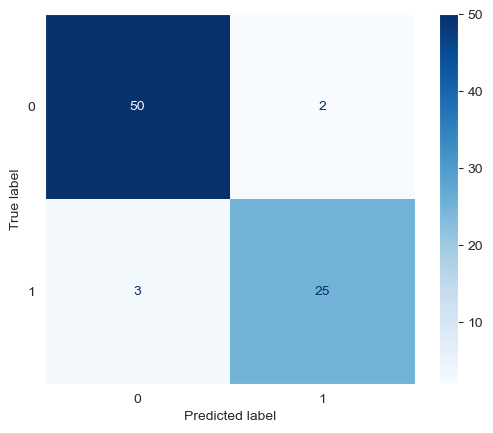

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues').ax_.grid(False)

In [1]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaled_X_test[:, :2], y_test.to_numpy()  # Assuming only 2 features for visualization
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
    np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
)
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, gaussian_nb_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')), edgecolors='k')
plt.title('Gaussian Nb Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'scaled_X_test' is not defined